# Notación Big O y su Implementación

La notación **Big O** se utiliza para describir el rendimiento de los algoritmos en función del tamaño de la entrada. Ayuda a analizar la eficiencia de un algoritmo en términos de tiempo y espacio.

## Complejidades Comunes

| Notación | Nombre | Ejemplo |
|----------|--------|---------|
| O(1) | Constante | Acceder a un elemento de una lista |
| O(log n) | Logarítmica | Búsqueda binaria |
| O(n) | Lineal | Recorrer una lista |
| O(n log n) | Lineal logarítmica | Merge Sort, QuickSort, Heap Sort |
| O(n²) | Cuadrática | Algoritmos de ordenamiento anidados, Selection Sort |
| O(nk) | Lineal Dependiente | Radix Sort |

A continuación, implementaremos ejemplos en código para analizar su rendimiento.

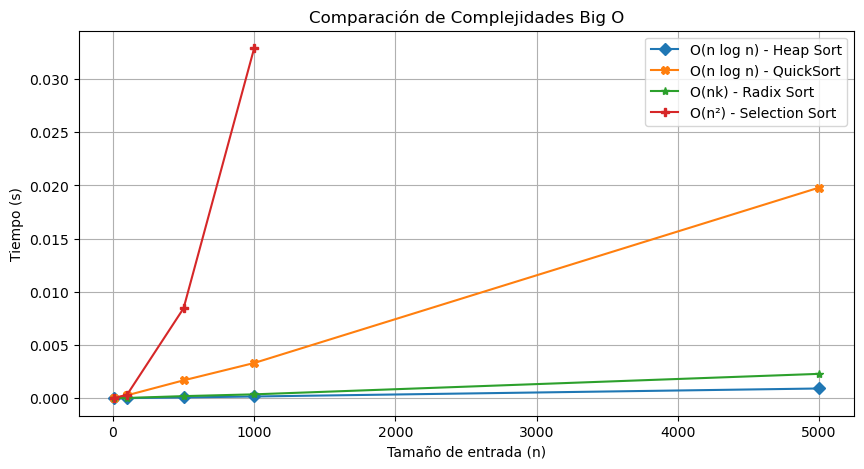

In [11]:

import time
import matplotlib.pyplot as plt
import numpy as np
import random

# O(1) - Tiempo constante
def constant_time(arr):
    start_time = time.time()
    _ = arr[0]  # Accede al primer elemento
    return time.time() - start_time

# O(n) - Tiempo lineal
def linear_time(n):
    start_time = time.time()
    for i in range(n):
        _ = i * 2
    return time.time() - start_time

# O(n^2) - Tiempo cuadrático
def quadratic_time(n):
    start_time = time.time()
    for i in range(n):
        for j in range(n):
            _ = i * j
    return time.time() - start_time

# O(log n) - Tiempo logarítmico
def log_time(n):
    start_time = time.time()
    i = 1
    while i < n:
        i *= 2
    return time.time() - start_time

# Implementación de algoritmos de ordenamiento
def heap_sort(arr):
    import heapq
    start_time = time.time()
    heapq.heapify(arr)
    sorted_arr = [heapq.heappop(arr) for _ in range(len(arr))]
    return time.time() - start_time


def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

def quicksort_time(arr):
    start_time = time.time()
    _ = quick_sort(arr)
    return time.time() - start_time


def radix_sort(arr):
    max_digit = max(arr) if arr else 0
    exp = 1
    start_time = time.time()
    while max_digit // exp > 0:
        buckets = [[] for _ in range(10)]
        for num in arr:
            buckets[(num // exp) % 10].append(num)
        arr = [num for bucket in buckets for num in bucket]
        exp *= 10
    return time.time() - start_time


def selection_sort(arr):
    start_time = time.time()
    for i in range(len(arr)):
        min_idx = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return time.time() - start_time

# Graficar resultados
def plot_results():
    n_values = [10, 100, 500, 1000, 5000]
    times_linear = [linear_time(n) for n in n_values]
    times_quadratic = [quadratic_time(n) for n in n_values[:4]]  # Evitar tiempos largos
    times_log = [log_time(n) for n in n_values]
    
    times_heap = [heap_sort(random.sample(range(n), n)) for n in n_values]
    times_quick = [quicksort_time(random.sample(range(n), n)) for n in n_values]
    times_radix = [radix_sort(random.sample(range(n), n)) for n in n_values]
    times_selection = [selection_sort(random.sample(range(n), n)) for n in n_values[:4]]
    
    plt.figure(figsize=(10, 5))
    # plt.plot(n_values, times_linear, label='O(n) - Lineal', marker='o')
    # plt.plot(n_values[:4], times_quadratic, label='O(n²) - Cuadrático', marker='s')
    # plt.plot(n_values, times_log, label='O(log n) - Logarítmico', marker='^')
    plt.plot(n_values, times_heap, label='O(n log n) - Heap Sort', marker='D')
    plt.plot(n_values, times_quick, label='O(n log n) - QuickSort', marker='X')
    plt.plot(n_values, times_radix, label='O(nk) - Radix Sort', marker='*')
    plt.plot(n_values[:4], times_selection, label='O(n²) - Selection Sort', marker='P')
    
    plt.xlabel('Tamaño de entrada (n)')
    plt.ylabel('Tiempo (s)')
    plt.title('Comparación de Complejidades Big O')
    plt.legend()
    plt.grid()
    plt.show()

plot_results()

In [12]:
# base la a finrmacion dle profesor creamos este codigo
import matplotlib.pyplot as plt
from random import randint,randrange
import time

def quick_sort(array: list)->list:
    if len(array) < 2:
        return array
    pivot_index = randrange(0, len(array))
    pivot =array.pop(pivot_index)
    
    lesser=[item for item in array if item <= pivot]
    greater=[item for item in array if item > pivot]
    
    return [quick_sort(lesser) ,pivot, quick_sort(greater)]

# Se pide la cantidad de datos

# Interactivo: pedir cantidad de datos
N = int(input("Cantidad de datos a generar: "))
Arreglo = [random.randint(0, 100000) for _ in range(N)]
execution_times = []


start_time=time.time()
#aqui se invoca el metodo de ordenamiento
quick_sort(Arreglo)
tiempo2 = time.time()
print(time.time() - start_time)



0.0009851455688476562


indcando de la forma fisica de mi equipo de computo damos infrmacion de lo optenido 

El método de ordenamiento Radix es un algoritmo de ordenamiento no comparativo que ordena elementos (generalmente números enteros o cadenas) procesando sus dígitos o caracteres individuales. A diferencia de los algoritmos de ordenamiento que comparan directamente los elementos entre sí, Radix Sort distribuye los elementos en "cubos" o "baldes" basándose en el valor de un dígito o carácter específico, y luego combina estos cubos para obtener la lista ordenada.

### Funcionalidad del método Radix:

- Procesamiento por dígitos/caracteres: Radix Sort examina los elementos dígito por dígito (en números) o carácter por carácter (en cadenas), comenzando por el dígito o carácter menos significativo y avanzando hacia el más significativo.

- Distribución en cubos/baldes: Para cada dígito o carácter, los elementos se distribuyen en cubos o baldes según su valor. Por ejemplo, si estamos ordenando números decimales, tendríamos 10 cubos (del 0 al 9) para cada dígito.

- Combinación de cubos: Después de distribuir los elementos en los cubos para un dígito o carácter específico, los cubos se combinan en orden para formar una nueva lista.

- Repetición del proceso: Los pasos 2 y 3 se repiten para cada dígito o carácter, avanzando desde el menos significativo hasta el más significativo. En cada iteración, el orden de los elementos se refina hasta que la lista completa queda ordenada.

para la parte divisora y trabajar con la posicion del residuo 

In [13]:
caracter = '1'
valor_ascii = ord(caracter)
print(f"El valor ASCII de '{caracter}' es: {valor_ascii}")

El valor ASCII de '1' es: 49


In [14]:
mi_cubeta={0:"",1:"",2:"",3:"",4:"",5:"",6:"",7:"",8:"",9:""}

listado=["12345678","16","415","24","802","90","91","12345","123456","1234567","123456789"]

# Encontrar la longitud más larga en la lista
longitud_maxima = max(map(len, listado))

print(longitud_maxima)  # 9

ejemplo="123456"

# print(len(ejemplo))
puntero=len(ejemplo)-1
# print(ejemplo[puntero-2])

puntero=longitud_maxima-1

# while puntero >= 0:
#     for  elemento in listado:
#         temp =elemento[puntero]
# print(ejemplo)
# print(int((int(ejemplo)/1)))
# print(int((int(ejemplo)/1)%10))
# print(int((int(ejemplo)/10)%10))
# print(int((int(ejemplo)/100)%10))
# print(int((int(ejemplo)/1000)%10))
# print(int((int(ejemplo)/10000)%10))
# print(int((int(ejemplo)/100000)%10))
# print(int((int(ejemplo)/1000000)%10))
for puntero in range(longitud_maxima):


SyntaxError: incomplete input (983584255.py, line 30)

# Búsqueda Secuencial

El **método de búsqueda secuencial** es un algoritmo simple que se utiliza para encontrar un elemento en una lista o arreglo. Consiste en recorrer la lista de manera ordenada, comparando cada elemento con el valor buscado hasta encontrarlo o llegar al final de la lista.

## Características
- Funciona en listas **ordenadas o desordenadas**.
- Tiene una **complejidad de tiempo O(n)** en el peor de los casos, donde *n* es el número de elementos.
- Es **ineficiente** para grandes volúmenes de datos, pero útil para listas pequeñas o cuando los elementos están desordenados.

## Ejemplo en pseudocódigo
```python
def busqueda_secuencial(lista, valor):
    for i in range(len(lista)):
        if lista[i] == valor:
            return i  # Devuelve la posición del elemento
    return -1  # No encontrado


In [9]:
# usando con el ejemplo del profesor
def busquedaLineal(a, aBuscar):
    for i in range(len(a)):
        if a[i] == aBuscar:
            return i
    return -1

lista = [ 34, 1, 5, 4, 67, 70, 46, 6, 18, 24, 48 ]
valor = 70
resultado = busquedaLineal(lista, valor)
print(resultado)

if resultado == -1:
    print("Valor no encontrado")
else:
    print("Valor encontrado en la posicion " + str(resultado))

5
Valor encontrado en la posicion 5


In [18]:
def busquedaBinaria(array,aBusqueda,inicio,fin):
    if inicio > fin:
        return -1

    centro = inicio + (fin - inicio) // 2
    
    if array[centro] == aBusqueda:
        return centro
    elif array[centro] < aBusqueda:
        return busquedaBinaria(array, aBusqueda, centro + 1, fin)
    else:
        return busquedaBinaria(array, aBusqueda, inicio, centro - 1)
    
lista = [ 34, 1, 5, 4, 67, 70, 46, 6, 18, 24, 48 ]
valor = 1
lista.sort()
resultado = busquedaBinaria(lista, valor, 0, len(lista) - 1)
if resultado == -1:
    print("Valor no encontrado")
else:
    print("Valor encontrado en la posicion " + str(resultado))

Valor encontrado en la posicion 0


# Árboles Binarios

## Introducción
Un **árbol binario** es una estructura de datos en la que cada nodo tiene como máximo dos hijos, denominados hijo izquierdo e hijo derecho. Estos árboles se utilizan en diversas aplicaciones de la informática y las ciencias de la computación debido a su eficiencia en la organización y búsqueda de datos.

## Tipos de Árboles Binarios
Existen diferentes tipos de árboles binarios, entre ellos:

- **Árbol binario completo**: Todos los niveles, excepto posiblemente el último, están completamente llenos.
- **Árbol binario lleno**: Cada nodo tiene 0 o 2 hijos.
- **Árbol binario perfecto**: Todos los nodos internos tienen dos hijos y todas las hojas están al mismo nivel.
- **Árbol binario de búsqueda (BST)**: Los nodos están ordenados de manera que el hijo izquierdo contiene valores menores y el hijo derecho valores mayores.

## Aplicaciones de los Árboles Binarios
Los árboles binarios se utilizan en diversas áreas, tales como:

### 1. **Búsqueda y ordenación**
   - Árboles binarios de búsqueda (BST) facilitan la búsqueda, inserción y eliminación en **O(log n)** en promedio.
   - Se utilizan en estructuras como los **árboles AVL** y **árboles rojo-negro** para mantener el equilibrio y garantizar un rendimiento óptimo.

### 2. **Expresión y compilación de lenguajes**
   - Árboles de expresión matemática.
   - Árboles de sintaxis abstracta en compiladores.

### 3. **Sistemas de archivos**
   - Los sistemas de archivos organizan directorios y archivos en estructuras de árbol.

### 4. **Inteligencia Artificial**
   - Árboles de decisión en aprendizaje automático.
   - Árboles de minimax en juegos de inteligencia artificial.

### 5. **Compresión de Datos**
   - Árbol de Huffman para compresión de datos en algoritmos de codificación.

## Implementación Básica en Python
A continuación, se muestra una implementación básica de un árbol binario en Python:

```python
class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izquierdo = None
        self.derecho = None

class ArbolBinario:
    def __init__(self):
        self.raiz = None

    def insertar(self, valor):
        if self.raiz is None:
            self.raiz = Nodo(valor)
        else:
            self._insertar_recursivo(self.raiz, valor)

    def _insertar_recursivo(self, nodo, valor):
        if valor < nodo.valor:
            if nodo.izquierdo is None:
                nodo.izquierdo = Nodo(valor)
            else:
                self._insertar_recursivo(nodo.izquierdo, valor)
        else:
            if nodo.derecho is None:
                nodo.derecho = Nodo(valor)
            else:
                self._insertar_recursivo(nodo.derecho, valor)
```

## Conclusión
Los árboles binarios son estructuras fundamentales en la informática, con aplicaciones en bases de datos, inteligencia artificial, algoritmos de búsqueda y más. Su uso eficiente permite mejorar el rendimiento en diversos sistemas y aplicaciones computacionales.

In [ ]:
class Nodo:
    def __init__(self,dato):
        self.dato=dato
        self.izquierda=None
        self.derecha=None
        
class Arbol:
    def __init__(self,dato):
        self.Raiz=Nodo(dato)
    
    def __agregarRecursivo(self,nodo,dato):
        if dato < nodo.dato:
            if nodo.izquierda is None:
                nodo.izquierda=Nodo(dato)
            else:
                self.__agregarRecursivo(nodo.izquierda,dato)
        else:
            if nodo.derecha is None:
                nodo.derecha=Nodo(dato)
            else:
                self.__agregarRecursivo(nodo.derecha,dato)
                
    def __inOrdenRecursivo(self,nodo):
        if nodo is not None:
            self.__inOrdenRecursivo(nodo.izquierda)
            print(nodo.dato, end="")
            self.__inOrdenRecursivo(nodo.derecha)
    
    def __preOrdenRecursivo(self,nodo):
        if nodo is not None:
            print(nodo.dato, end="")
            self.__preOrdenRecursivo(nodo.izquierda)
            self.__preOrdenRecursivo(nodo.derecha)
    
    def __posOrdenRecursivo(self,nodo):
        if nodo is not None:
            self.__posOrdenRecursivo(nodo.izquierda)
            self.__posOrdenRecursivo(nodo.derecha)
            print(nodo.dato, end="")
            
    def __buscar(self,nodo,busqueda):
        if nodo is None:
            return None
        if nodo.dato== busqueda:
            return nodo
        if busqueda < nodo.dato:
            return self.__buscar(nodo.izquierda,busqueda)
        else:
            return self.__buscar(nodo.derecha,busqueda)